In [1]:
%cd /home/aditya/Documents/SOMBL/
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from tqdm import tqdm
import seaborn as sns

import scripts.plot_utils as putils
import scripts.plot_densities as pdens
import scripts.calc_grgrstar_funcs  as grfuncs

sns.set()
sns.set_style("ticks")

/home/aditya/Documents/SOMBL


In [2]:
%config InlineBackend.figure_format = 'svg'

In [3]:
length = 100
# pattern = "altn_altupdown_updown"
# pattern = "altn_altupdown_empty"
# pattern = "altn_random_updown"
pattern = "altn_randomequalmean_updown"
# pattern = "alt_up_down"

In [4]:
colorbar_kwargs = {
    "location": "right",
    "fraction": 0.046,
    "pad": 0.04,
    "format": "%.2e"
}

In [5]:
def get_data(length, pattern):
    # df = pd.read_csv(f"data/spin_imbalances_twoset_error_sample_L{length}_{pattern}.dat")
    df = pd.read_csv(f"data/spin_imbalances_error_L{length}_{pattern}.dat")
    # df = pd.read_csv(f"data/charge_imbalances_error_L{length}_{pattern}.dat")
    
    complex_types = {
        'spin_up_imb_S_plus': complex,
        'spin_up_imb_S_minus': complex,
        'spin_up_imb_S_x': complex,
        'spin_up_imb_S_y': complex,
        'spin_up_imb_S_z': complex,
        # 'staggered_mag_z': complex,

        'spin_up_imb_S_plus_var': complex,
        'spin_up_imb_S_minus_var': complex,
        'spin_up_imb_S_x_var': complex,
        'spin_up_imb_S_y_var': complex,
        'spin_up_imb_S_z_var': complex,
        # 'staggered_mag_z_var': complex,
    }
    df = df.astype(complex_types)
    return df

In [6]:
def get_charge_data(length, pattern):
    # df = pd.read_csv(f"data/spin_imbalances_twoset_error_sample_L{length}_{pattern}.dat")
    # df = pd.read_csv(f"data/spin_imbalances_error_L{length}_{pattern}.dat")
    df = pd.read_csv(f"data/charge_imbalances_error_L{length}_{pattern}.dat")
    return df

In [7]:
# df100 = get_data(100, pattern)
df100 = get_charge_data(100, pattern)

# dfcomp = get_data(100, "altn_altupdown_updown")

/tmp/ipykernel_96026/1441828777.py:29: RuntimeWarning: invalid value encountered in sqrt
  yerr = np.sqrt(-np.real(data[value + "_var"]))


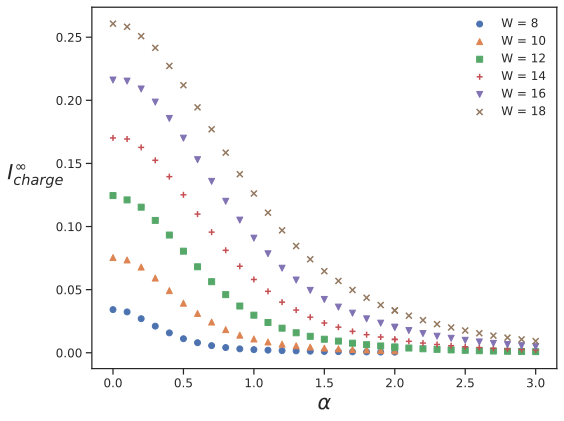

In [8]:
lengths = [30, 60, 100]
cmap = sns.color_palette("husl", as_cmap=True)
# couplings = [0, 0.5, 1, 1.5, 2, 2.5, 3.0]
disorders = [8, 10, 12, 14, 16, 18]
markers = ["o", "^", "s", "+", "v", "x"]
colors = cmap(np.linspace(0, 1, len(disorders)))

# for i in range(3):
df = df100
length = lengths[2]

# value = "staggered_mag_z"
# value = "spin_up_imb_S_z"
value = "spin_up_imb_charge"
imb_type = "PM"
# imb_type = "PZM"

fig = plt.figure(figsize=(8,6))

for i in range(len(disorders)):  
    # coupling = couplings[i]
    disorder = disorders[i]
    marker = markers[i]
    data = df.loc[np.isclose(df["disorder"], disorder)]
    x = np.array(data["coupling"])
    # y = (np.real(data["spin_up_imb_S_z"]) - np.real(data30["spin_up_imb_S_z"])) / np.real(data30["spin_up_imb_S_z"])
    y = np.real(data[value])
    # y /= y.max()
    yerr = np.sqrt(-np.real(data[value + "_var"]))
    # print(np.abs(data[value + "_var"]) > 1e-8)
    labels = data["disorder"]
    # plt.plot(x, y, marker="o", label=f"W = {disorder}")
    plt.scatter(x, y, marker=marker, label=f"W = {disorder}")
    # for j in range(len(x)):
    # #     # plt.errorbar(x[j], y[j], yerr=yerr[j], linestyle="", marker=".",
    # #     #              color=colors[i], capsize=5, label=f"L = {length}")
    #     plt.scatter(x[j], y[j], marker="o", s=16,
    #                  color=colors[i], label=f"L = {length}")

# df = dfcomp
# for i in range(len(disorders)):  
#     # coupling = couplings[i]
#     disorder = disorders[i]
#     data = df.loc[np.isclose(df["disorder"], disorder)]
#     x = np.array(data["coupling"])
#     # y = (np.real(data["spin_up_imb_S_z"]) - np.real(data30["spin_up_imb_S_z"])) / np.real(data30["spin_up_imb_S_z"])
#     y = np.real(data[value])
#     yerr = np.sqrt(-np.real(data[value + "_var"]))
#     labels = data["disorder"]
#     cmap = plt.cm.viridis
#     plt.plot(x, y, marker="o", label=f"OG W = {disorder}")
#     # for j in range(len(x)):
#     #     # plt.errorbar(x[j], y[j], yerr=yerr[j], linestyle="", marker=".",
#     #     #              color=colors[i], capsize=5, label=f"L = {length}")
#     #     plt.scatter(x[j], y[j], marker=".",
#     #                  color=colors[i], label=f"L = {length}")

# plt.yscale()
# plt.title(r"$c = $" + f"{disorder}")
# plt.yscale("log")
# plt.ylim(-0.01, 1.01)
# plt.ylabel(r"$I_{S_z}^{\infty}$", fontsize="x-large", rotation=0, labelpad=20)
plt.ylabel(r"$I_{charge}^{\infty}$", fontsize="xx-large", rotation=0, labelpad=20)
plt.xlabel(r"$\alpha$", fontsize="xx-large")
# plt.title(value + " " + imb_type)
plt.legend()


# handles = []
# for i in range(len(disorders)):
#     handles.append(mpl.patches.Patch(color=colors[i], label=f"W = {disorders[i]}"))
# # plt.legend(handles=handles, bbox_to_anchor=(1.3,1.0), loc="upper right")
# plt.legend(handles=handles, loc="upper right", fontsize="medium", frameon=False)
plt.legend(loc="upper right", fontsize="medium", frameon=False)

ax = plt.gca()
ax.xaxis.set_tick_params(labelsize="medium")
ax.yaxis.set_tick_params(labelsize="medium")

plt.tight_layout()
# plt.savefig(f"plots/PDFs/Imb_vs_coupling_{pattern}_{value}_{imb_type}.pdf")
# plt.savefig(f"plots/PNGs/Imb_vs_coupling_{pattern}_{value}_{imb_type}.png")
plt.savefig(f"plots/PDFs/Imb_vs_coupling_{pattern}_{value}_{imb_type}_ppt.pdf")
# plt.savefig(f"plots/PDFs/Imb_vs_coupling_{pattern}_{value}_{imb_type}_ppt.svg")
plt.savefig(f"plots/PNGs/Imb_vs_coupling_{pattern}_{value}_{imb_type}_ppt.png", dpi=300)

In [5]:
setPlus = []
setMinus = []
for x in range(60):
    for y in range(60):
        if ((x + y) % 4 == 0):
            setPlus.append(x + y*60)
        elif ((x + y) % 2 == 0):
            setMinus.append(x + y*60)
        else:
            continue


In [6]:
for x in range(10):
    for y in range(10):
        index = x + 60*y
        if index in setPlus:
            print("+ ", end="")
            continue
        if index in setMinus:
            print("- ", end="")
            continue
        print("H ", end="")
    print()


+ H - H + H - H + H 
H - H + H - H + H - 
- H + H - H + H - H 
H + H - H + H - H + 
+ H - H + H - H + H 
H - H + H - H + H - 
- H + H - H + H - H 
H + H - H + H - H + 
+ H - H + H - H + H 
H - H + H - H + H - 


In [7]:
density, density_vars = grfuncs.get_densities(100, 2.3, 16, -1, pattern)

NameError: name 'pattern' is not defined

In [48]:
n_up, n_down, S_plus, S_minus = density

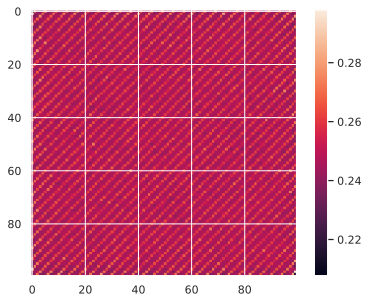

In [49]:
plt.imshow(n_up)
plt.colorbar()

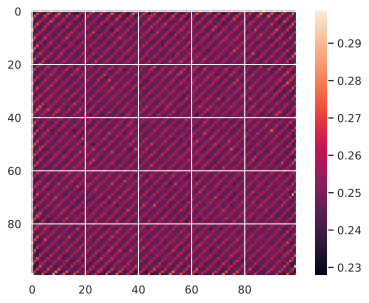

In [50]:
plt.imshow(n_down)
plt.colorbar()

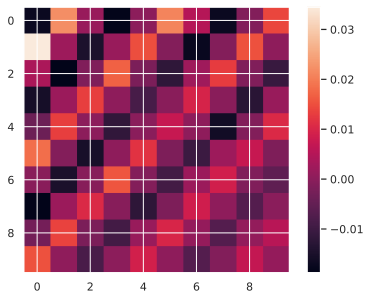

In [51]:
S_z = (n_up-n_down)/2
plt.imshow(S_z[:10,:10])
plt.colorbar()

In [52]:
mag = 0
for index in setPlus:
    x = index % 60
    y = index // 60
    mag += S_z[x, y]

norm = 60 * 60 / 4
    
print(mag / norm)

-3.623300000000039e-05


In [53]:
mag = 0
for index in setMinus:
    x = index % 60
    y = index // 60
    mag -= S_z[x, y]
norm = 60 * 60 / 4
print(mag / norm)

-5.525316666666761e-05


In [54]:
print(np.sum(S_z) * 2/ (60 * 60))

-5.560558333333265e-05


In [55]:
mag = 0
for x in range(60):
    for y in range(60):
        if (x + y) % 2 == 0:
            mag += S_z[x, y]
        else:
            mag -= S_z[x, y]
print(mag / (60 * 60))

2.8268062500000148e-05


In [83]:
setPlus = []
setMinus = []
maskL = 4
for x in range(maskL):
    for y in range(maskL):
        if ((x + y) % 4 == 1):
            setPlus.append(x + y*maskL)
        elif ((x + y) % 4 == 3):
            setMinus.append(x + y*maskL)
        else:
            continue

two_mask = grfuncs.get_twoset_mask(maskL, setPlus, setMinus)[0]

two_mask_annot = np.empty(two_mask.shape, dtype=str)
two_mask_annot[two_mask == 1] = "A"
two_mask_annot[two_mask == -1] = "B"
two_mask_annot[two_mask == 0] = ""

In [84]:
setA = []
for x in range(maskL):
    for y in range(maskL):
        if ((x + y) % 2 == 0):
            setA.append(x + y*maskL)
one_mask = grfuncs.get_oneset_mask(maskL, setA)[0]

one_mask_annot = np.empty(one_mask.shape, dtype=str)
one_mask_annot[one_mask == 1] = "A"
one_mask_annot[one_mask == -1] = "B"

In [85]:
print(two_mask)
print(two_mask_annot)

[[ 0  1  0 -1]
 [ 1  0 -1  0]
 [ 0 -1  0  1]
 [-1  0  1  0]]
[['' 'A' '' 'B']
 ['A' '' 'B' '']
 ['' 'B' '' 'A']
 ['B' '' 'A' '']]


In [86]:
print(one_mask)
print(one_mask_annot)

[[ 1 -1  1 -1]
 [-1  1 -1  1]
 [ 1 -1  1 -1]
 [-1  1 -1  1]]
[['A' 'B' 'A' 'B']
 ['B' 'A' 'B' 'A']
 ['A' 'B' 'A' 'B']
 ['B' 'A' 'B' 'A']]


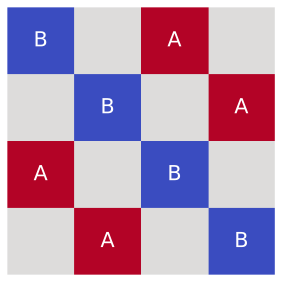

In [87]:
plt.matshow(two_mask, cmap=plt.cm.coolwarm, origin="lower")

for i in range(maskL):
    for j in range(maskL):
        text = plt.text(i, j, two_mask_annot[i, j],
                       ha="center", va="center", color="white", fontsize="xx-large")

plt.axis("off")
plt.grid(False)
# plt.colorbar()
plt.savefig("plots/PDFs/two_mask_altn.pdf", bbox_inches="tight")
plt.savefig("plots/PNGs/two_mask_altn.png", bbox_inches="tight")

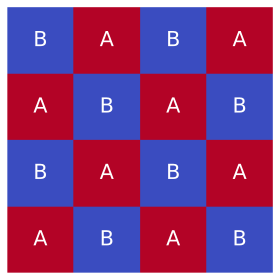

In [69]:
plt.imshow(one_mask, cmap=plt.cm.coolwarm, origin="lower")

for i in range(maskL):
    for j in range(maskL):
        text = plt.text(i, j, one_mask_annot[i, j],
                       ha="center", va="center", color="white", fontsize="xx-large")

plt.grid(False)
plt.axis("off")
# plt.colorbar()
plt.savefig("plots/PDFs/one_mask_AB.pdf", bbox_inches="tight")
plt.savefig("plots/PNGs/one_mask_AB.png", bbox_inches="tight")